In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from GA import genetic_algorithm

def solve(problem, 
          population_size=100, 
          generations=100, 
          mutation_rate=0.1, 
          mutation_algorithm='swap', 
          crossover_algorithm='order', 
          selection_algorithm='elitism'):
    n_cities = len(problem)
    
    solution = genetic_algorithm(n_cities, problem, 
                                 population_size=population_size, 
                                 generations=generations, 
                                 mutation_rate=mutation_rate, 
                                 mutation_algorithm=mutation_algorithm, 
                                 crossover_algorithm=crossover_algorithm, 
                                 selection_algorithm=selection_algorithm)
    
    return solution['distance'], solution['route'], solution['fitness']
def plot_fitness(fitness):
    plt.plot(fitness)
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Fitness over generations")
    plt.show()

In [2]:
def read_file(file_name):
    with open(file_name, 'r') as file:
        problem = []
        for line in file:
            if line.strip():
                row = list(map(int, line.split()))
                problem.append(row)
    return problem
problem = read_file('data/6Cities-1248.txt')

In [3]:
distances, route, fitness = solve(problem, generations=100, mutation_rate=0.01, population_size=100, 
                                    mutation_algorithm='swap', crossover_algorithm='order', selection_algorithm='elitism')
print(distances)
print(route)

1248
[0, 1, 2, 3, 4, 5, 0]


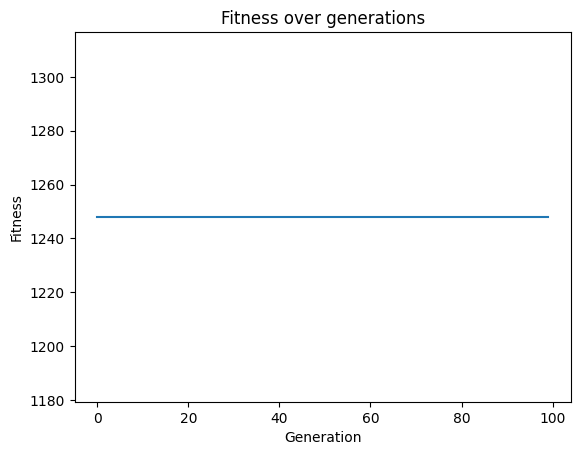

In [5]:
plot_fitness(fitness)

*** Tournament Selection - Single-Point Crossover - Inversion Mutation ***

In [6]:
distances, route, fitness = solve(problem, generations=100, mutation_rate=0.01, population_size=100, 
                                    selection_algorithm='tournament', mutation_algorithm='inversion', crossover_algorithm='single_point')
print(distances)
print(route)

1248
[0, 5, 4, 3, 2, 1, 0]


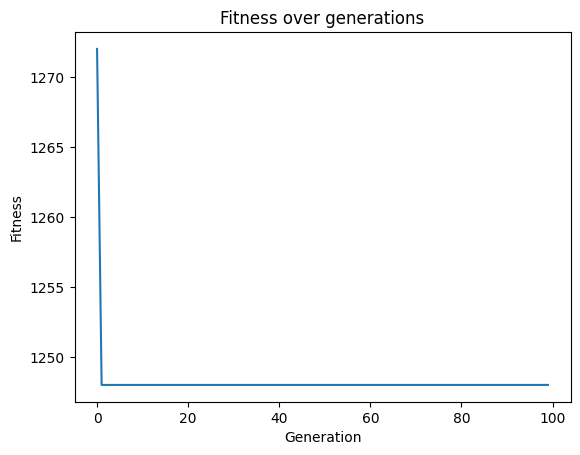

In [7]:
plot_fitness(fitness)

# Đồ thị fitness cho thấy sự cải thiện ban đầu nhanh chóng khi fitness giảm từ khoảng 1270 xuống 1245 chỉ trong một vài thế hệ đầu, nhờ vào sự kết hợp hiệu quả của tournament selection, single-point crossover và inversion mutation. Tournament selection giúp lựa chọn các cá thể tốt nhất, đảm bảo rằng các đặc điểm tốt được duy trì qua các thế hệ. Single-point crossover giữ lại thông tin từ một phần của bố mẹ, giúp duy trì cấu trúc tốt, trong khi inversion mutation tăng cường đa dạng bằng cách đảo ngược thứ tự của một đoạn trên cá thể. Tuy nhiên, sau cải thiện ban đầu, đồ thị trở nên ổn định ở khoảng 1245, cho thấy thuật toán đã tìm ra một lời giải cận tối ưu và không cải thiện đáng kể thêm qua các thế hệ.

*** Rank Selection - Two-Point Crossover - Scramble Mutation ***

In [8]:
distances, route, fitness = solve(problem, generations=100, mutation_rate=0.01, population_size=100, 
                                    selection_algorithm='rank', mutation_algorithm='scramble', crossover_algorithm='two_point')
print(distances)
print(route)

1248
[0, 1, 2, 3, 4, 5, 0]


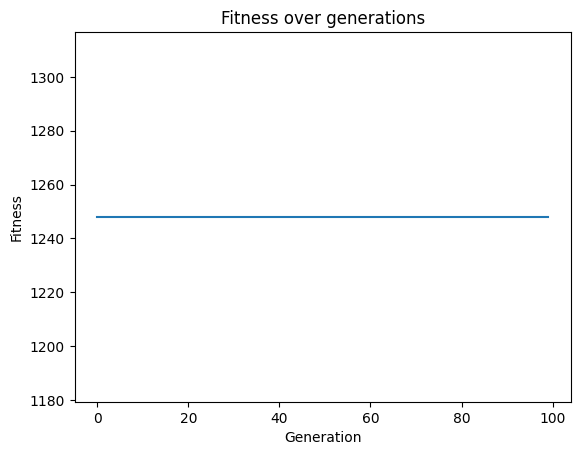

In [9]:
plot_fitness(fitness)

# Đồ thị cho thấy fitness ban đầu đã ở múc 1248 và ổn định ở những thế hệ sau không thay đổi --> tìm ra đáp án tối ưu. Rank Selection duy trì các cá thể tốt, nhưng với 6 thành phố, thuật toán nhanh chóng đạt nghiệm cục bộ. Two-Point Crossover và Scramble Mutation (tỷ lệ đột biến 0.01) tạo ra một số đa dạng, nhưng không đủ để thoát khỏi nghiệm cục bộ. 

*** Roulette wheel selection - Uniform crossover - Insertion mutation ***

In [10]:
distances, route, fitness = solve(problem, generations=100, mutation_rate=0.01, population_size=100, 
                                    selection_algorithm='roulette_wheel', mutation_algorithm='insertion', crossover_algorithm='uniform')
print(distances)
print(route)

1248
[0, 1, 2, 3, 4, 5, 0]


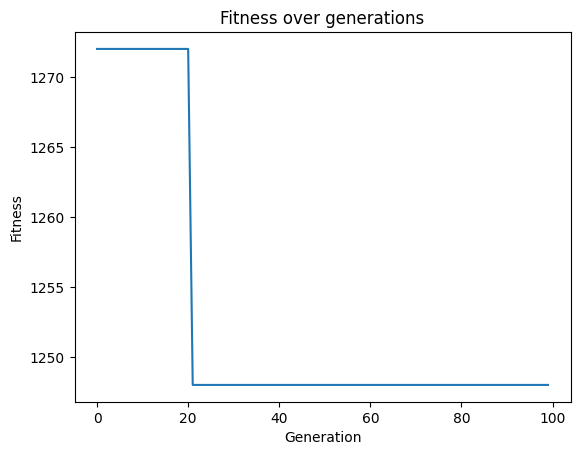

In [11]:
plot_fitness(fitness)

# Thuật toán di truyền ban đầu thể hiện sự tăng trưởng nhanh chóng về fitness của quần thể lên trên 1270, nhờ đa dạng di truyền do lai ghép đồng đều và đột biến chèn thêm tạo ra. Tuy nhiên, nhờ sự duy trì tốt của Roulette wheel selection quá trình tiến hóa dần ổn định và tìm ra cá thể tốt nhất ở mức 1248 khi quần thể tìm thấy gần tối ưu. Mặc dù các phép toán di truyền vẫn tiếp tục diễn ra, nhưng khả năng tạo ra những đột biến mang lại cải thiện đáng kể cho fitness đã giảm đi đáng kể.